# Assignment 4
author:Tong

## 1 回归问题和分类问题
***回归问题和分类问题的联系和区别，如何利用回归问题理解分类问题？***

分类问题的预测因变量是离散型变量，而回归问题的预测隐变量是连续型变量。如果我们用回归结果离散化为离散型变量，也可以用回归模型解决分类模型，在这个地方的离散化可以理解为分类的概率。但是这样做有一定的缺陷，因为连续型变量有大小差别，而离散型变量常常没有大小区别，所以常规的机器学习回归模型用于分类问题并没有那么合适，但是神经网络可以多输出，所以可用。

## 2 损失函数
***为什么分类问题的损失函数可以是交叉熵而不是均方根误差***

因为我们需要用梯度下降法去求的最优解，而均方根误差显然不是凸函数，很难求出全局最优解，相比之下交叉熵函数更适合使用梯度下降法求解。

## 3 线性判别分析
***线性判别分析和逻辑回归在估计参数方面有什么异同点***

逻辑回归对参数用样本使用极大似然估计，估计在自变量下因变量取值的概率。在求解过程中，使用的是梯度下降法进行求解。     
线性判别分析同样是估计在自变量下因变量取值的概率，但是是使用贝叶斯定理，不需要求出具体的概率值，贝叶斯定理的分子就可以，比较分子最大的那个类别为最终类别。

## 6 逻辑回归
***使用python+numpy实现逻辑回归***

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def grad_descent(dataMatIn, classLabels,epoch = 500):
    dataMatrix = np.mat(dataMatIn)  
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    weights = np.ones((n, 1))  
    lr = 0.001 

    for i in range(epoch):
        h = sigmoid(dataMatrix * weights) 
        weights = weights + lr * dataMatrix.transpose() * (labelMat - h)
    return weights

In [20]:
def predict(x,weights):
    result = sigmoid(x * weights)
    return np.around(result, decimals=0)

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [7]:
X = data.data
y = data.target

In [11]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
w = grad_descent(X_train, y_train)

d:\programdata\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [21]:
y_pred = predict(X_test,w)

d:\programdata\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [16]:
from sklearn.metrics import confusion_matrix

In [22]:
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)

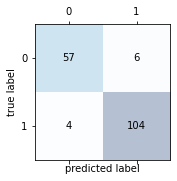

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()